# Analyzing Wine Data

### Data Set Information:
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
https://archive.ics.uci.edu/ml/datasets/wine+quality

Each wine sample comes with a quality rating of one to ten, and results from several chemical tests, i.e. properties like alcohol content, acidity level and residual sugar. 

I have conducted a exploratory data analysis on the data to answer the following questions
1. Is a specific type of wine associated with higher quality?
2. Do wines with higher alcohol content receive better ratings?
3. Do sweeter wine (more residual sugar) receive better ratings?
4. What level of acidity is associated with the highest quality?




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
red_df = pd.read_csv('winequality-red.csv',sep=';')
white_df = pd.read_csv('winequality-white.csv', sep=';') 

In [2]:
#exploring data sets
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# number of samples in each dataset
# number of columns in each dataset
red_df.shape

(1599, 12)

In [5]:
print('How many samples of red wine are there?\n'+str(red_df.shape[0])+'\n')
print('How many samples of white wine are there?\n'+str(white_df.shape[0])+'\n')
print('How many columns are in each dataset?\n'+str(white_df.shape[1])+'\n')

How many samples of red wine are there?
1599

How many samples of white wine are there?
4898

How many columns are in each dataset?
12



In [6]:
#features with missing values
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


There are no Missing values in either of the dataset.

In [8]:
#duplicate rows in the white wine dataset
print('How many duplicate rows are in the white wine dataset?\n'+str(white_df.duplicated().sum()))

How many duplicate rows are in the white wine dataset?
937


In [9]:
#number of unique values for quality in each dataset
print('How many unique values of quality are in the red wine dataset?\n'+str(red_df['quality'].nunique())+'\n')

print('How many unique values of quality are in the white wine dataset?\n'+str(white_df['quality'].nunique()))

How many unique values of quality are in the red wine dataset?
6

How many unique values of quality are in the white wine dataset?
7


In [10]:
#mean density of the red wine dataset
print('What is the mean density in the red wine dataset?\n'+str(red_df['density'].mean()))

What is the mean density in the red wine dataset?
0.9967466791744833


# Appending Data
## Create Color Columns
Create two arrays as long as the number of rows in the red and white dataframes that repeat the value “red” or “white.” NumPy offers really easy way to do this. Here’s the documentation for [NumPy’s repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) function. Take a look and try it yourself.

In [11]:
color_red = np.repeat('red',red_df.shape[0])
color_white = np.repeat('white', white_df.shape[0])

Add arrays to the red and white dataframes. Do this by setting a new column called 'color' to the appropriate array. The cell below does this for the red dataframe.

In [12]:
red_df['color'] = color_red
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [13]:
white_df['color'] = color_white
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


## Combine DataFrames with Append
Check the documentation for [Pandas' append](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html) function and see if you can use this to figure out how to combine the dataframes.

In [14]:
wine_df = red_df.append(white_df)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [15]:
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


## Save Combined Dataset
Save your newly combined dataframe as `winequality_edited.csv`. Remember, set `index=False` to avoid saving with an unnamed column!

In [16]:
wine_df.to_csv('winequality_edited.csv', index= False)

# Exploratory Data Analysis with Visuals
Create visualizations to answer the questions about the data.

Based on histograms of columns in this dataset, which of the following feature variables appear skewed to the right? Fixed Acidity, Total Sulfur Dioxide, pH, Alcohol

- Based on the histogram below the Fixed Acidity and Alcohol variables appear to be right skewed

### Histograms for Various Features

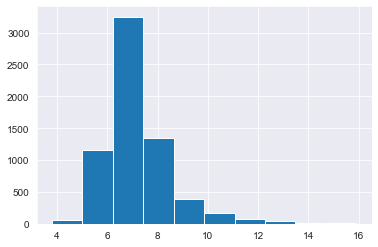

In [17]:
wine_df['fixed acidity'].hist()

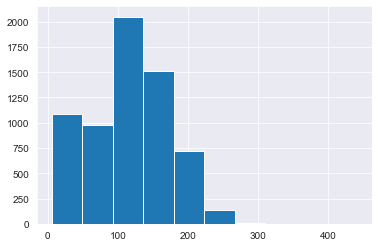

In [18]:
wine_df['total sulfur dioxide'].hist()

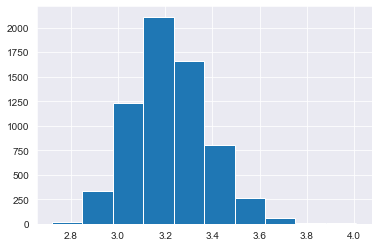

In [19]:
wine_df['pH'].hist()

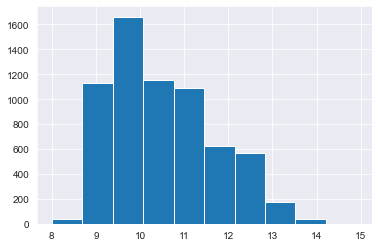

In [20]:
wine_df['alcohol'].hist()

### Scatterplots of Quality Against Various Features

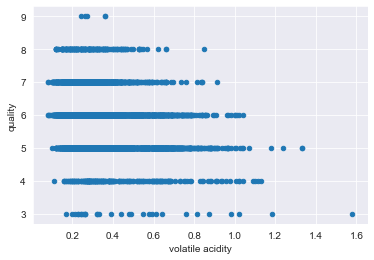

In [21]:
wine_df.plot(x="volatile acidity", y="quality", kind="scatter");

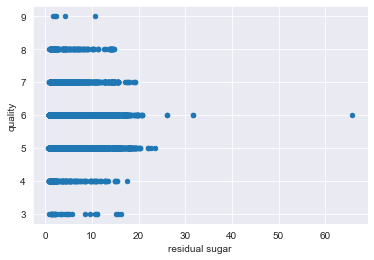

In [22]:
wine_df.plot(x="residual sugar", y="quality", kind="scatter");

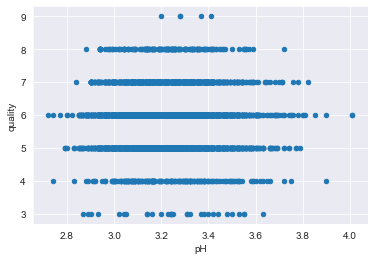

In [23]:
wine_df.plot(x="pH", y="quality", kind="scatter");

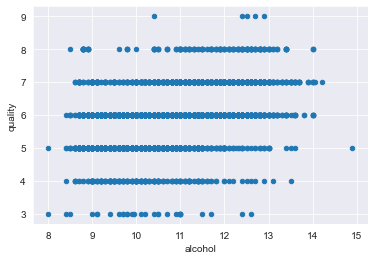

In [24]:
wine_df.plot(x="alcohol", y="quality", kind="scatter");

# Drawing Conclusions


### Is a certain type of wine associated with higher quality?
### Is the mean quality of red wine greater than, less than, or equal to that of white wine?
- The mean quality of red wine is less than that of white wine

In [25]:
#To answer this question, I compared the average quality of red wine with the average quality of white wine with groupby. 
#To do this group by color and then find the mean quality of each group.

wine_df.groupby(['color'])['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

### What level of acidity receives the highest average rating?

This question is more tricky because unlike color, which has clear categories you can group by (red and white) pH is a quantitative variable without clear categories. However, there is a simple fix to this. You can create a categorical variable from a quantitative variable by creating your own categories. pandas' [cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) function let's you "cut" data in groups. Using this, create a new column called acidity_levels with these categories:

Acidity Levels:
High: Lowest 25% of pH values
Moderately High: 25% - 50% of pH values
Medium: 50% - 75% of pH values
Low: 75% - max pH value
Here, the data is being split at the 25th, 50th, and 75th percentile. Remember, you can get these numbers with pandas' describe()! After you create these four categories, you'll be able to use groupby to get the mean quality rating for each acidity level.


### What level of acidity receives the highest mean quality rating?
- The low level of acidity receives the highest mean quality rating.

In [26]:
wine_df['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [27]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [ 2.72,3.11 ,3.21 ,3.32 ,4.01 ] # Fill in this list with five values you just found

In [28]:
# Labels for the four acidity level groups
bin_names = ['high', 'mod_high', 'medium', 'low'] # Name each acidity level category

In [29]:
# Creates acidity_levels column
wine_df['acidity_level'] = pd.cut(wine_df['pH'],bin_edges, labels= bin_names )

# Checks for successful creation of this column
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [30]:
# Find the mean quality of each acidity level with groupby

acidity_level_quality_means = wine_df.groupby('acidity_level')['quality'].mean()
acidity_level_quality_means

acidity_level
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

In [31]:
# Save changes for the next section
wine_df.to_csv('winequality_edited.csv', index=False)

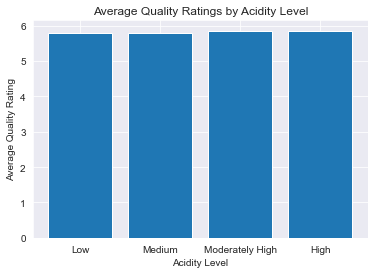

In [32]:
locations = [1,2,3,4]  # reorder values above to go from low to high
heights = acidity_level_quality_means
labels = ['Low', 'Medium', 'Moderately High', 'High']
plt.bar(locations,acidity_level_quality_means, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');

### Do wines with higher alcoholic content receive better ratings?
To answer this question, use query to create two groups of wine samples:

Low alcohol (samples with an alcohol content less than the median)
High alcohol (samples with an alcohol content greater than or equal to the median)
Then, find the mean quality rating of each group.

### Do wines with higher alcoholic content generally receive better ratings?
Yes

In [33]:
# get the median amount of alcohol content
wine_df.alcohol.median()

10.3

In [34]:
# select samples with alcohol content less than the median
low_alcohol = wine_df.query('alcohol < {}'.format(wine_df.alcohol.median()))

# select samples with alcohol content greater than or equal to the median
high_alcohol = wine_df.query('alcohol >= {}'.format(wine_df.alcohol.median()))

# ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [35]:
# get mean quality rating for the low alcohol and high alcohol groups
# select each group and get its mean quality
mean_quality_low = low_alcohol['quality'].mean()
mean_quality_high = high_alcohol.quality.mean()

print('Mean quality rating for low alcohol {:.2f}'.format(mean_quality_low))
print('Mean quality rating for high alcohol {:.2f}'.format(mean_quality_high))


Mean quality rating for low alcohol 5.48
Mean quality rating for high alcohol 6.15


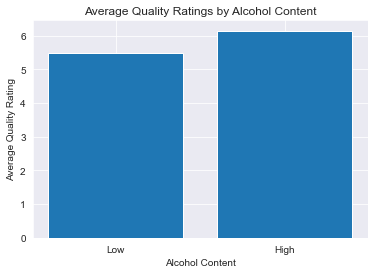

In [36]:
# Visualizing Data
# Create a bar chart with proper labels
locations = [1,2]
heights =[mean_quality_low,mean_quality_high]
labels =['Low','High']
plt.bar(locations,heights, tick_label = labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### Do sweeter wines(more  residual sugar) receive better ratings?
Similarly, use the median to split the samples into two groups by residual sugar and find the mean quality rating of each group.

### Do sweeter wines generally receive higher ratings?
Yes

In [37]:
#get the median amount for residual sugar
wine_df['residual sugar'].median()

3.0

In [38]:
#select sample with sugar level less than the mean
low_sugar = wine_df[wine_df['residual sugar'] < 3]

#select sample with sugar level more than equal to the mean
high_sugar = wine_df[wine_df['residual sugar'] >= 3]

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [39]:
# get mean quality rating for the low sugar and high sugar groups
sugar_mean_quality_low = low_sugar.quality.mean()
sugar_mean_quality_high = high_sugar.quality.mean()

print('Mean quality rating for low sugar {:.2f}'.format(sugar_mean_quality_low))
print('Mean quality rating for high sugar {:.2f}'.format(sugar_mean_quality_high))

Mean quality rating for low sugar 5.81
Mean quality rating for high sugar 5.83


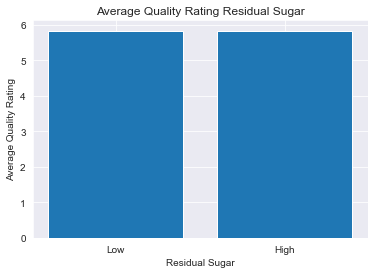

In [40]:
# Create a bar chart with proper labels
locations =[1,2]
height = [sugar_mean_quality_low,sugar_mean_quality_high]
labels = ['Low','High']
plt.bar(locations,height,tick_label=labels)
plt.title('Average Quality Rating Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');

### Create arrays for red bar heights white bar heights
Remember, there's a bar for each combination of color and quality rating. Each bar's height is based on the proportion of samples of that color with that quality rating.
1. Red bar proportions = counts for each quality rating / total # of red samples
2. White bar proportions = counts for each quality rating / total # of white samples

In [41]:
# get counts for each rating and color
color_counts = wine_df.groupby(['color','quality']).count().pH
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [42]:
# get total counts for each color
color_totals = wine_df.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [43]:
# get proportions by dividing red rating counts by total # of red samples
red_proportions = color_counts['red']/color_totals['red']
red_proportions['9'] = 0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

In [44]:
# get proportions by dividing white rating counts by total # of white samples
white_proportions = color_counts['white'] / color_totals['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

### Plot proportions on a bar chart
Set the x coordinate location for each rating group and and width of each bar.

In [45]:
ind = np.arange(len(red_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

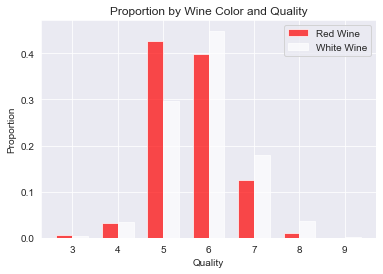

In [46]:
#plot bars
red_bars = plt.bar(ind, red_proportions, width,color='r', alpha=0.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=0.7, label='White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()